# Simulator Scenarios

In [1]:
from montecarlo import Die
from montecarlo import Game
from montecarlo import Analyzer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Welcome to the Monte Carlo Simulator.


## Scenario 1

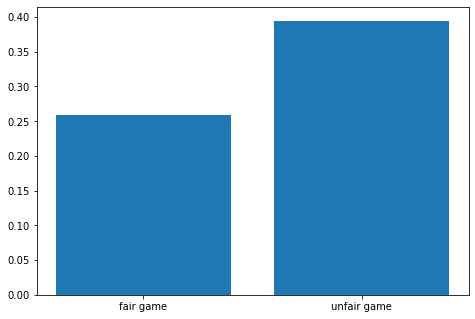

In [2]:
"""
Create a fair coin (with faces H and T)
and one unfair coin, in which one of the faces has a weight of 5 and the others 1.
"""
fair_die = Die(["H", "T"])
unfair_die = Die(["H", "T"])
unfair_die.change_weight("H", 5)

# Play a game of 1000 flips with all fair dice.
fair_game = Game([fair_die, fair_die, fair_die]) 
fair_game.play(1000)

# Play a game of 1000 flips with two unfair dice and one fair die.
unfair_game = Game([unfair_die, unfair_die, fair_die]) 
unfair_game.play(1000)

# For each game, use an Analyzer object to determine the relative frequency of jackpots – getting either all Hs or all Ts.
fair_analyzer = Analyzer(fair_game)
unfair_analyzer = Analyzer(unfair_game)
relative_freq_jackpot = fair_analyzer.jackpot() / unfair_analyzer.jackpot()

# Compute relative frequency as the number of jackpots over the total number of rolls.
relative_freq_jackpot_rolls_fair = fair_analyzer.jackpot() / 1000
relative_freq_jackpot_rolls_unfair = unfair_analyzer.jackpot() / 1000

# Show your results, comparing the two relative frequencies, in a simple bar chart.
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
games = ["fair game", "unfair game"]
freq = [relative_freq_jackpot_rolls_fair, relative_freq_jackpot_rolls_unfair]
ax.bar(games, freq)
plt.show()

## Scenario 2

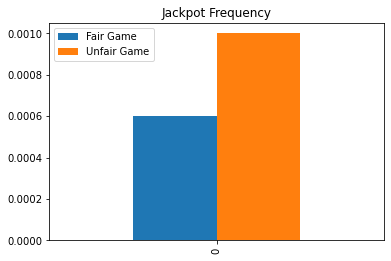

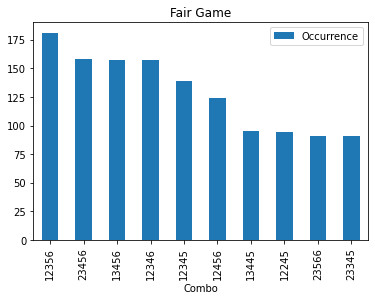

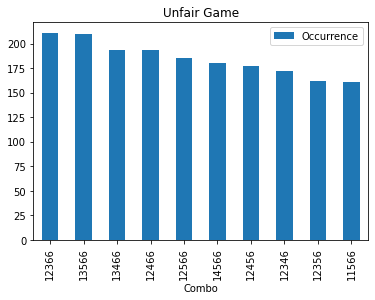

In [3]:
"""
Create a fair die and two unfair dice, all of six sides with the faces 1 through 6. 
One unfair die (Type 1) will weight 6 five times more than the others (i.e. it has weight of 5 and the others a weight of 1 each). 
The other unfair die (Type 2) will  weight 1 five times more than the others.
"""
fair_die_six_sides = Die([1,2,3,4,5,6])
unfair_die_six_sides_1 = Die([1,2,3,4,5,6])
unfair_die_six_sides_1.change_weight(6, 5)
unfair_die_six_sides_2 = Die([1,2,3,4,5,6])
unfair_die_six_sides_2.change_weight(1, 5)

# Play a game of 10000 rolls with 5 fair dice.
fair_game_six_sides = Game([fair_die_six_sides, fair_die_six_sides, fair_die_six_sides, fair_die_six_sides, fair_die_six_sides])
fair_game_six_sides.play(10000)

# Play a game of 10000 rolls with 2 unfair dice of type 1, 1 unfair die of type 2, and the rest fair dice.
unfair_game_six_sides = Game([unfair_die_six_sides_1, unfair_die_six_sides_1, unfair_die_six_sides_2, fair_die_six_sides, fair_die_six_sides])
unfair_game_six_sides.play(10000)

# For each game, use an Analyzer object to determine the relative frequency of jackpots and show your results, comparing the two relative frequencies, in a simple bar chart.
fair_analyzer_six_sides = Analyzer(fair_game_six_sides)
unfair_analyzer_six_sides = Analyzer(unfair_game_six_sides)
fair_analyzer_six_sides_jackpot_freq = fair_analyzer_six_sides.jackpot() / 10000
unfair_analyzer_six_sides_jackpot_freq = unfair_analyzer_six_sides.jackpot() / 10000

jackpot_freq = pd.DataFrame({"Fair Game":[fair_analyzer_six_sides_jackpot_freq], "Unfair Game":[unfair_analyzer_six_sides_jackpot_freq]})
jackpot_freq.plot.bar(title="Jackpot Frequency")
plt.show()

# Also compute 10 most frequent combinations of faces for each game. Plot each of these as bar charts.
fair_analyzer_six_sides_combos = fair_analyzer_six_sides.combo()['Occurrence'].nlargest(n=10).reset_index()
fair_analyzer_six_sides_combos["Combo"] = fair_analyzer_six_sides_combos["Face Value #1"].astype(str)+fair_analyzer_six_sides_combos["Face Value #2"].astype(str)+fair_analyzer_six_sides_combos["Face Value #3"].astype(str)+fair_analyzer_six_sides_combos["Face Value #4"].astype(str)+fair_analyzer_six_sides_combos["Face Value #5"].astype(str)
fair_analyzer_six_sides_combos.plot.bar(x="Combo", y="Occurrence", title="Fair Game")
plt.show()

unfair_analyzer_six_sides_combos = unfair_analyzer_six_sides.combo()['Occurrence'].nlargest(n=10).reset_index()
unfair_analyzer_six_sides_combos["Combo"] = unfair_analyzer_six_sides_combos["Face Value #1"].astype(str)+unfair_analyzer_six_sides_combos["Face Value #2"].astype(str)+unfair_analyzer_six_sides_combos["Face Value #3"].astype(str)+unfair_analyzer_six_sides_combos["Face Value #4"].astype(str)+unfair_analyzer_six_sides_combos["Face Value #5"].astype(str)
unfair_analyzer_six_sides_combos.plot.bar(x="Combo", y="Occurrence", title="Unfair Game")
plt.show()


## Scenario 3

In [5]:
# Create a "die" of letters from a to z with weights based on their frequency of usage.
alphabet = [chr(i) for i in range(65, 91)]
alphabet_weights = {"A":8.4966, "B":2.0720, "C":4.5388, "D":3.3844, "E":11.1607, "F":1.8121, "G":2.4705, "H":3.0034, 
                    "I":7.5448, "J":0.1965, "K":1.1016, "L":5.4893, "M":3.0129, "N":6.6544, "O":7.1635, "P":3.1671, 
                    "Q":0.1962, "R":7.5809, "S":5.7351, "T":6.9509, "U":3.6308, "V":1.0074, "W":1.2899, "X":0.2902, 
                    "Y":1.7779, "Z":0.2722}
alphabet_die = Die(alphabet)
for x in alphabet_weights:
    alphabet_die.change_weight(x, alphabet_weights[x])

# Play a game involving 5 of these dice with 1000 rolls.
alphabet_game = Game([alphabet_die, alphabet_die, alphabet_die, alphabet_die, alphabet_die])
alphabet_game.play(1000)

# How many combos can you that look like actual English words? ← NOTE: "combo" here just means resulting sequence, not literally combination as opposed to permutation.
alphabet_analyzer = Analyzer(alphabet_game)
alphabet_combo_df = alphabet_analyzer.combo(permutation=True)
word = []
for i in range(1000):
    word.append("".join(list(alphabet_combo_df.iloc[i].name)))
np.array(word)
# Based on your eye count, what is the relative frequency of these words versus the rest?
# There were 3 words within the 1000 rolls; the frequency is 0.3%

array(['AAALM', 'AAAUR', 'AAODL', 'AAWAH', 'AAYEA', 'ABRME', 'ACVAA',
       'ACWNI', 'ADAAH', 'ADAPE', 'ADIBA', 'AEDIY', 'AEDOO', 'AEEEU',
       'AEIDT', 'AERIN', 'AETLW', 'AGAGR', 'AGEDL', 'AGNNH', 'AHINL',
       'AHTRA', 'AIAEE', 'AICBI', 'AIIIF', 'AIRAT', 'ALBSI', 'ALECL',
       'AMOBE', 'AMTAU', 'ANCOD', 'ANFCD', 'ANMIM', 'ANORL', 'AONWI',
       'AOPDB', 'AOPMA', 'APOTS', 'ARCNY', 'ARIAR', 'AROAC', 'AROTR',
       'ARTAE', 'ARTCP', 'ARTOF', 'ASAST', 'ASBCA', 'ASESO', 'ASLST',
       'ASVPF', 'ATBCD', 'ATCKD', 'ATDTM', 'ATEIC', 'ATIAB', 'ATITO',
       'ATUGE', 'ATYHL', 'AUEAP', 'AUILL', 'AUIOE', 'AULDI', 'AUOAF',
       'AUSES', 'AVROM', 'AWHEE', 'AWIHL', 'AYERA', 'AYHEE', 'AYIDE',
       'AYIOE', 'BALIP', 'BARER', 'BCOET', 'BEEOG', 'BESOP', 'BFFLI',
       'BFWBU', 'BIIHA', 'BIOPT', 'BISNN', 'BNHNE', 'BNLHC', 'BNOCR',
       'BPTSD', 'BSYIN', 'BTRHD', 'BWREH', 'CAAYE', 'CAILI', 'CAUNM',
       'CAYHT', 'CBLPR', 'CCPOR', 'CCSFI', 'CDPSU', 'CDRBM', 'CDVJT',
       'CEEEE', 'CEI